In [1]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.m = np.random.randn()
        self.b = np.random.randn()
        self.loss_history = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n = len(y)

        for epoch in range(self.epochs):
            y_pred = self.m * X + self.b

            loss = np.mean((y - y_pred) ** 2)
            self.loss_history.append(loss)

            dm = (-2 / n) * np.sum(X * (y - y_pred))
            db = (-2 / n) * np.sum(y - y_pred)

            self.m = self.m - self.lr * dm
            self.b = self.b - self.lr * db

    def predict(self, X):
        X = np.array(X)
        return self.m * X + self.b

Modelo entrenado:
Pendiente (m): 3.0956
Intercepto (b): 0.2921
MSE final: 4.4399


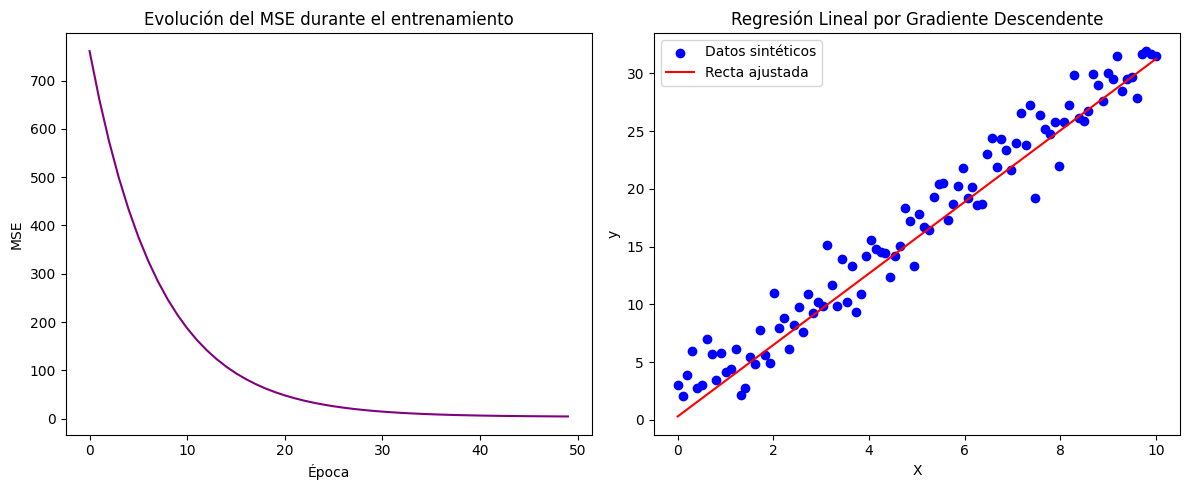

In [10]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # 1. Generar datos sintéticos
    np.random.seed(42)
    X = np.linspace(0, 10, 100)
    noise = np.random.randn(100) * 2
    y = 2 + 3 * X + noise

    # 2. Entrenar el modelo con gradiente descendiente
    lr = 0.001
    epochs = 50
    model = LinearRegressionScratch(lr, epochs)
    model.fit(X, y)

    # 3. Obtener las predicciones
    y_pred = model.predict(X)

    print("Modelo entrenado:")
    print(f"Pendiente (m): {model.m:.4f}")
    print(f"Intercepto (b): {model.b:.4f}")
    print(f"MSE final: {model.loss_history[-1]:.4f}")

    # 4. Graficar resultados

    # a) Evolución del MSE en el entrenamiento
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(model.loss_history, color='purple')
    plt.xlabel("Época")
    plt.ylabel("MSE")
    plt.title("Evolución del MSE durante el entrenamiento")

    # b) Datos sintéticos y la recta de regresión ajustada
    plt.subplot(1, 2, 2)
    plt.scatter(X, y, label="Datos sintéticos", color='blue')
    plt.plot(X, y_pred, color='red', label="Recta ajustada")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Regresión Lineal por Gradiente Descendente")
    plt.legend()

    plt.tight_layout()
    plt.show()
